# Auto ARIMA demo 
 
source : https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c


In [86]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline


from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

from statsmodels.tsa.stattools import acf, pacf
from pyramid.arima import auto_arima

from sklearn.metrics import mean_squared_error
import random
from math import sqrt

# For serialization:
from sklearn.externals import joblib
import pickle

In [87]:
rcParams['figure.figsize'] = 15, 6
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [88]:
model_file = 'None'

csv_file = 'powertest_CRAC3_2.out.csv'


## Read csv file, model file (if exists)


In [89]:
if model_file != 'None':
    #ACF and PACF plots:
    print 'reading from '+csv_file
    
 
print 'reading from '+csv_file

#define format for date time
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
# dateparse('2018-05-16 14:41:00')
data = pd.read_csv(csv_file, parse_dates=[0], index_col=0,date_parser=dateparse)
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)
#print data.index
#print data.head()
#print data.dtypes
ts = data['Consumed_active_energy_kW']
#print ts






reading from powertest_CRAC3_2.out.csv


## divide train/test 

In [90]:
train_size = int(len(ts) * 0.67)
test_size = len(ts) - train_size
print ('train_size %d test_size %d\n'%(train_size,test_size))
train,test =ts[0:train_size], ts[train_size:len(ts)]

train_size 48885 test_size 24079



## Read model from model_file

In [91]:
if model_file == 'None':
    stepwise_model = auto_arima(train, start_p=2, start_q=2,
                           max_p=4, max_q=4, m=10,
                           start_P=0, seasonal=False,
                           d=1,max_d=1,  D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True, n_jobs=4 )
    print(stepwise_model.aic())

    stepwise_model.fit(train)
    print(stepwise_model.summary())

    r = random.randint(1,1000)
    filename = 'stepwise_arima'+str(r)+'.pkl'
    with open(filename, 'wb') as pkl:
        pickle.dump(stepwise_model, pkl)
    print 'saving to model pkl file '+filename +'\n'
    
    #stepwise_model.save(filename)

/Users/admin/Library/Python/2.7/lib/python/site-packages/pyramid/arima/auto.py:379: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: order=(2, 1, 2); AIC=-77704.897, BIC=-77652.114, Fit time=40.819 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-8041.868, BIC=-8024.274, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-66068.595, BIC=-66042.203, Fit time=0.326 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-46159.668, BIC=-46133.276, Fit time=2.660 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-77669.883, BIC=-77625.897, Fit time=33.425 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-77727.831, BIC=-77666.250, Fit time=38.738 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-74317.322, BIC=-74264.539, Fit time=29.896 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-77880.124, BIC=-77809.746, Fit time=32.360 seconds
Fit ARIMA: order=(4, 1, 4); AIC=-80067.672, BIC=-79979.700, Fit time=39.031 seconds
Fit ARIMA: order=(3, 1, 4); AIC=-79728.030, BIC=-79648.855, Fit time=50.300 seconds
Fit ARIMA: order=(4, 1, 3); AIC=-79364.747, BIC=-79285.572, Fit time=37.730 seconds
Total fit time: 305.319 seconds
-80067.6718661
                             ARIMA

## Predict test set

In [92]:
future_forecast = stepwise_model.predict(n_periods=test_size)
#print(future_forecast.head())
future_forecast =  pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])




## Calculate RMSE

In [93]:
#https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

rmse = sqrt(mean_squared_error(test,future_forecast))
print (rmse)

80.001520074


## Ploting predictions

RMSE TEST 80.0015 


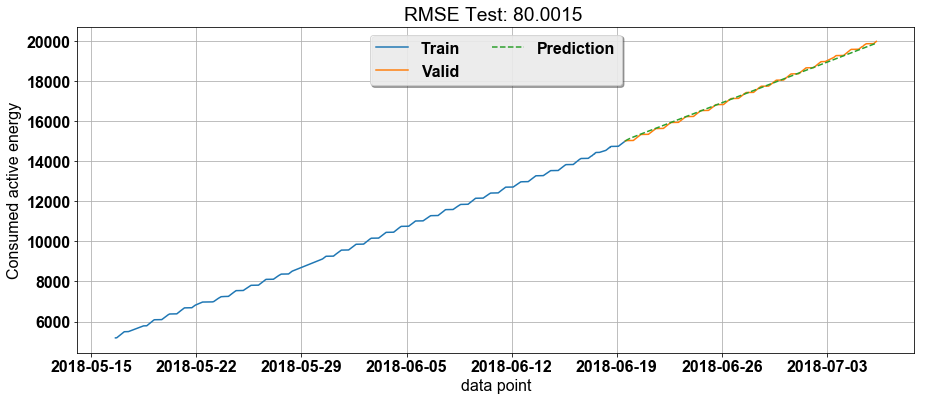

In [94]:
#plot the predictions for validation set
plt.grid("on")
plt.title('RMSE Test: %.4f '% rmse)
print('RMSE TEST %.4f '% rmse)


plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.grid("on")
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(future_forecast, label='Prediction',linestyle='--')
plt.legend(loc='upper center',  shadow=True, ncol=2)


plt.savefig( 'auto-'+str(r)+'-predicted-test.png')
plt.show()

## Prediction from loaded model

In [95]:
model_file = 'stepwise_arima765.pkl'

In [96]:
if model_file != 'None':
    with open(model_file, 'rb') as pkl:
        stepwise_model = pickle.load(pkl)

## Predict with 20,000 more points from test_size

In [97]:
future_forecast2 = stepwise_model.predict(n_periods=test_size+20000)
#print(future_forecast2.head())
#create data from future_forecast
print(future_forecast2)
#future_forecast2 =  pd.DataFrame(future_forecast2,indexcolumns=['Prediction'])


[15019.82138306 15020.18810594 15020.54839828 ... 23937.48583775
 23937.68710633 23937.88837492]


RMSE TEST 80.0015 


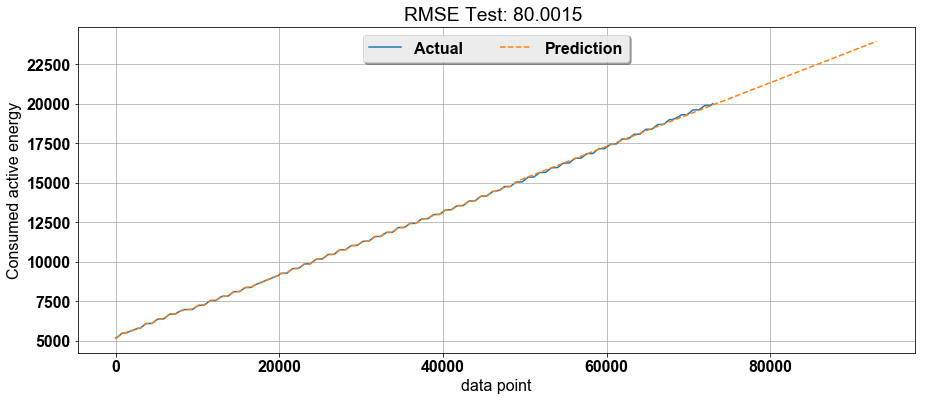

In [98]:
#plot the predictions for validation set
plt.grid("on")
plt.title('RMSE Test: %.4f '% rmse)
print('RMSE TEST %.4f '% rmse)


plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.grid("on")

all_data =  np.concatenate((train.values,test.values),axis=0)
plt.plot(all_data, label='Actual ')
all_data_with_predict =  np.concatenate((train.values,future_forecast2 ),axis=0)

plt.plot( all_data_with_predict, label='Prediction',linestyle='--')
plt.legend(loc='upper center',  shadow=True, ncol=2)


plt.show()

In [99]:
print(train[-3:])
train.tail(1) 

2018-06-19 13:23:00    15018.714
2018-06-19 13:24:00    15019.019
2018-06-19 13:25:00    15019.381
Freq: T, Name: Consumed_active_energy_kW, dtype: float64


2018-06-19 13:25:00    15019.381
Freq: T, Name: Consumed_active_energy_kW, dtype: float64

In [100]:
start_time = train.tail(1).index.format()

print(start_time[0])
new_range = pd.date_range(start_time[0] ,periods=test_size+20000, freq='1min')
print (new_range)


2018-06-19 13:25:00
DatetimeIndex(['2018-06-19 13:25:00', '2018-06-19 13:26:00',
               '2018-06-19 13:27:00', '2018-06-19 13:28:00',
               '2018-06-19 13:29:00', '2018-06-19 13:30:00',
               '2018-06-19 13:31:00', '2018-06-19 13:32:00',
               '2018-06-19 13:33:00', '2018-06-19 13:34:00',
               ...
               '2018-07-20 03:54:00', '2018-07-20 03:55:00',
               '2018-07-20 03:56:00', '2018-07-20 03:57:00',
               '2018-07-20 03:58:00', '2018-07-20 03:59:00',
               '2018-07-20 04:00:00', '2018-07-20 04:01:00',
               '2018-07-20 04:02:00', '2018-07-20 04:03:00'],
              dtype='datetime64[ns]', length=44079, freq='T')


In [101]:
future_forecast2 =  pd.DataFrame(future_forecast2,index= new_range)


RMSE TEST 80.0015 


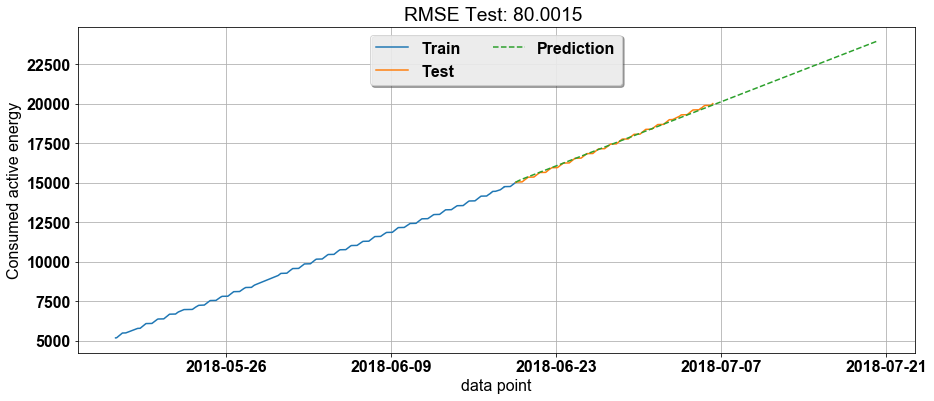

In [102]:
#plot the future predictions  with time index
plt.grid("on")
plt.title('RMSE Test: %.4f '% rmse)
print('RMSE TEST %.4f '% rmse)


plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.grid("on")
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(future_forecast2, label='Prediction',linestyle='--')
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()